In [ ]:
pip install opencv-python pytesseract matplotlib numpy


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg


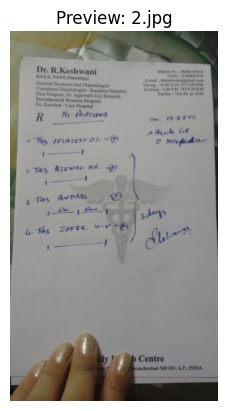

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Open image using PIL (works better with Colab uploads)
img = Image.open('2.jpg')

# Convert to NumPy array so OpenCV/pytesseract can use it
img_np = np.array(img)

# Show image
plt.imshow(img_np)
plt.title("Preview: 2.jpg")
plt.axis("off")
plt.show()


Image shape: (1280, 720, 3)


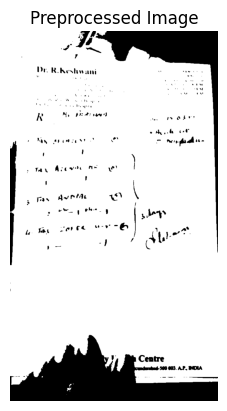

In [ ]:
import cv2
import numpy as np
print("Image shape:", img_np.shape)  # See if it's RGB (3 channels) or grayscale (1 channel)

# If it's already grayscale, skip conversion
if len(img_np.shape) == 2:
    gray = img_np  # already grayscale
else:
    gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

# Continue as usual
blur = cv2.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')
plt.title("Preprocessed Image")
plt.axis("off")
plt.show()


In [ ]:
import pytesseract

# Run OCR on preprocessed image
text = pytesseract.image_to_string(thresh)

# Print the extracted text
print("Extracted Text:\n")
print(text)


Extracted Text:

   

R Ny Ptr

Man sponses Oe oN fade
' '

Tay Acoveee Ae ye
'

ey thee gy

fay cerca oO

, - a ‚Äò abe

'
fas Aver rac ys \
1

 



Observations:
2.jpg gave unclear results

1.jpg was already grayscale, put conditional to check


3.jpg, gave a bit better results

--lets try to mprove them




### Try multiple --psm (Page Segmentation Modes) and --oem (OCR Engine Modes) to see which one gives the best output for your 3 test images.

| Config     | Meaning                                          |
| ---------- | ------------------------------------------------ |
| `Default`  | What Tesseract normally does                     |
| `--psm 6`  | Treats image as a block of text                  |
| `--psm 7`  | Treats image as a single text line               |
| `--psm 11` | Tries to find sparse, disconnected text elements |


In [ ]:
import pytesseract

# Dictionary of different config modes
configs = {
    "Default": "",
    "PSM 6 (block of text)": r'--oem 3 --psm 6',
    "PSM 7 (single line)": r'--oem 3 --psm 7',
    "PSM 11 (sparse text)": r'--oem 3 --psm 11'
}

# Run OCR for each config and print the results
for name, config in configs.items():
    print(f"--- OCR Output using {name} ---\n")
    text = pytesseract.image_to_string(thresh, config=config)
    print(text)
    print("="*60)


--- OCR Output using Default ---

   

R Ny Ptr

Man sponses Oe oN fade
' '

Tay Acoveee Ae ye
'

ey thee gy

fay cerca oO

, - a ‚Äò abe

'
fas Aver rac ys \
1

 

--- OCR Output using PSM 6 (block of text) ---

1
a ~,
: ,
Dr. R.Reshwani ~ a!
R My. per Pr awed ta NOP
eA ee
Van apomcast oO a‚Äú 7 nen prada
; '
Tay Areva ee )
\ '
, Tas Avni ‚Äú \
3 1
ee oben |
: ' ' shay
yaa cere eV ¬Æ ure?
s
‚Äî | C
v Centre
$00 000. ALP, NDLA

--- OCR Output using PSM 7 (single line) ---


--- OCR Output using PSM 11 (sparse text) ---

Ie

Dr K.Reshuvani

wa

.

st

or

bw

RO‚Äù

Pir wd

maser

eA

May

Abia st

.

J

on

Teepe

'

'

wow |

Tax Aiowts

'

fas

Aver rac

¬©

ewig obs

'

y deyy

Tas

Dare‚Äô

ewe

a

|

‚Äî

J bbe

Centre

00 000. AP.

a+

‚Äî




for 1.jpg

| Config      | Output Quality    | Comments                                                                               |
| ----------- | ----------------- | -------------------------------------------------------------------------------------- |
| **Default** | üî∏ **Basic**      | Picked up a few partial words like `Diyoe`, `Mees`, `Pate`, but still messy            |
| **PSM 6**   | ‚úÖ **Best so far** | Extracted more words, some better formatting (`Bs cr ae`, `ar Ome es`, `aM Pate d Se`) |
| **PSM 7**   | ‚ùå Very Poor       | Only picked punctuation ‚Äî this mode is meant for **neatly written single lines**       |
| **PSM 11**  | üî∏ Scattered      | Detected **random words/letters**, no structure, but more than PSM 7                   |


For 2.jpg

| Config      | Output Quality   | Observations                                                              |
| ----------- | ---------------- | ------------------------------------------------------------------------- |
| **Default** | üî∏ Okay          | Picked up broken text: "Man sponses", "Aver rac", etc.                    |
| **PSM 6**   | ‚úÖ **Best Again** | Detected doctor name ("Dr. R.Reshwani"), partial address, block structure |
| **PSM 7**   | ‚ùå Useless        | Blank (as expected ‚Äî single-line mode)                                    |
| **PSM 11**  | üî∏ Mixed         | Scattered but recognizable: ‚ÄúPir wd‚Äù, ‚ÄúTax Aiowts‚Äù, ‚ÄúCentre‚Äù, ‚ÄúAP‚Äù        |


For 3.jpg


| Mode        | Output Quality | Notes                                           |
| ----------- | -------------- | ----------------------------------------------- |
| **Default** | üî∏ Moderate    | Recognized multiple lines, but messy            |
| **PSM 6**   | ‚úÖ **Best**     | Recognized *names*, *medicine*, *structure*     |
| **PSM 7**   | ‚ùå Poor         | Only picked 1 word ‚Äî meant for single-line text |
| **PSM 11**  | üî∏ Okay        | Found scattered words, but disjointed           |





#### Now we have got the best config which is r'--oem 3 --psm 6'

Now let‚Äôs:

Write a loop to:

Preprocess each image

Run Tesseract using custom_config

Save filename and extracted text

Store results in a dictionary, and print/save them

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 1.jpg to 1 (1).jpg
Saving 2.jpg to 2 (1).jpg
Saving 3.jpg to 3 (1).jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Saving 10.jpg to 10.jpg
Saving 11.jpg to 11.jpg
Saving 12.jpg to 12.jpg
Saving 13.jpg to 13.jpg
Saving 14.jpg to 14.jpg
Saving 15.jpg to 15.jpg
Saving 16.jpg to 16.jpg
Saving 17.jpg to 17.jpg
Saving 18.jpg to 18.jpg
Saving 19.jpg to 19.jpg
Saving 20.jpg to 20.jpg
Saving 21.jpg to 21.jpg
Saving 22.jpg to 22.jpg
Saving 23.jpg to 23.jpg
Saving 24.jpg to 24.jpg
Saving 25.jpg to 25.jpg
Saving 26.jpg to 26.jpg
Saving 27.jpg to 27.jpg
Saving 28.jpg to 28.jpg
Saving 29.jpg to 29.jpg
Saving 30.jpg to 30.jpg
Saving 31.jpg to 31.jpg
Saving 32.jpg to 32.jpg
Saving 33.jpg to 33.jpg
Saving 34.jpg to 34.jpg
Saving 35.jpg to 35.jpg
Saving 36.jpg to 36.jpg
Saving 37.jpg to 37.jpg
Saving 38.jpg to 38.jpg
Saving 39.jpg to 39.jpg
Saving 40.jpg to 40.jpg
Saving 41.jpg to 41.jpg
Saving 42.jpg to 42.jp

In [ ]:
import cv2
import pytesseract
from PIL import Image
import numpy as np

# Final config
custom_config = r'--oem 3 --psm 6'

# Store results
ocr_results = {}

# Loop through uploaded images
for filename in uploaded.keys():
    try:
        # Load image using PIL (handles grayscale too)
        img = Image.open(filename)
        img_np = np.array(img)

        # Handle grayscale or RGB
        if len(img_np.shape) == 2:
            gray = img_np
        else:
            gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

        # Preprocessing
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # OCR
        text = pytesseract.image_to_string(thresh, config=custom_config)

        # Save result
        ocr_results[filename] = text

        print(f"\n OCR done for: {filename}")
    except Exception as e:
        print(f"\n Error processing {filename}: {e}")



 OCR done for: 1 (1).jpg

 OCR done for: 2 (1).jpg

 OCR done for: 3 (1).jpg

 OCR done for: 4.jpg

 OCR done for: 5.jpg

 OCR done for: 6.jpg

 OCR done for: 7.jpg

 OCR done for: 8.jpg

 OCR done for: 9.jpg

 OCR done for: 10.jpg

 OCR done for: 11.jpg

 OCR done for: 12.jpg

 OCR done for: 13.jpg

 OCR done for: 14.jpg

 OCR done for: 15.jpg

 OCR done for: 16.jpg

 OCR done for: 17.jpg

 OCR done for: 18.jpg

 OCR done for: 19.jpg

 OCR done for: 20.jpg

 OCR done for: 21.jpg

 OCR done for: 22.jpg

 OCR done for: 23.jpg

 OCR done for: 24.jpg

 OCR done for: 25.jpg

 OCR done for: 26.jpg

 OCR done for: 27.jpg

 OCR done for: 28.jpg

 OCR done for: 29.jpg

 OCR done for: 30.jpg

 OCR done for: 31.jpg

 OCR done for: 32.jpg

 OCR done for: 33.jpg

 OCR done for: 34.jpg

 OCR done for: 35.jpg

 OCR done for: 36.jpg

 OCR done for: 37.jpg

 OCR done for: 38.jpg

 OCR done for: 39.jpg

 OCR done for: 40.jpg

 OCR done for: 41.jpg

 OCR done for: 42.jpg

 OCR done for: 43.jpg

 OCR do

In [ ]:
with open("ocr_output.txt", "w") as f:
    for file, text in ocr_results.items():
        f.write(f"--- {file} ---\n{text}\n\n")


In [ ]:
files.download("ocr_output.txt")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 65.jpg to 65.jpg
Saving 66.jpg to 66.jpg
Saving 67.jpg to 67.jpg
Saving 68.jpg to 68.jpg
Saving 69.jpg to 69.jpg
Saving 70.jpg to 70.jpg
Saving 71.jpg to 71.jpg
Saving 72.jpg to 72.jpg
Saving 73.jpg to 73.jpg
Saving 74.jpg to 74.jpg
Saving 75.jpg to 75.jpg
Saving 76.jpg to 76.jpg
Saving 77.jpg to 77.jpg
Saving 78.jpg to 78.jpg
Saving 79.jpg to 79.jpg
Saving 80.jpg to 80.jpg
Saving 81.jpg to 81.jpg
Saving 82.jpg to 82.jpg
Saving 83.jpg to 83.jpg
Saving 84.jpg to 84.jpg
Saving 85.jpg to 85.jpg
Saving 86.jpg to 86.jpg
Saving 87.jpg to 87.jpg
Saving 88.jpg to 88.jpg
Saving 89.jpg to 89.jpg
Saving 90.jpg to 90.jpg
Saving 91.jpg to 91.jpg
Saving 92.jpg to 92.jpg
Saving 93.jpg to 93.jpg
Saving 94.jpg to 94.jpg
Saving 95.jpg to 95.jpg
Saving 96.jpg to 96.jpg
Saving 97.jpg to 97.jpg
Saving 98.jpg to 98.jpg
Saving 99.jpg to 99.jpg
Saving 100.jpg to 100.jpg
Saving 101.jpg to 101.jpg
Saving 102.jpg to 102.jpg
Saving 103.jpg to 103.jpg
Saving 104.jpg to 104.jpg
Saving 105.jpg to 105.jpg
Savi

In [ ]:
print(ocr_results)

{'1 (1).jpg': 'eres\ncrete\nen\nfrat\nBs cr ae\nhte nee]\nee\nar Ome es\nae\nnied\naM Pate d Se\nren\neens\n\x0c', '2 (1).jpg': "1\na ~,\n: ,\nDr. R.Reshwani ~ a!\nR My. per Pr awed ta NOP\neA ee\nVan apomcast oO a‚Äú 7 nen prada\n; '\nTay Areva ee )\n\\ '\n, Tas Avni ‚Äú \\\n3 1\nee oben |\n: ' ' shay\nyaa cere eV ¬Æ ure?\ns\n‚Äî | C\nv Centre\n$00 000. ALP, NDLA\n\x0c", '3 (1).jpg': '‚Äî - C6 -Pansec.\nsae BART\nAdasalas.ObeLoy Yr,\nmH.\nansce | Cele\n\x0c', '4.jpg': "ee ‚Äú4 ns inet eek\nso a A\n7\none A\nif r\nwif A\na‚Äú i ;\nPo Lo a\nes . A eee | =\n2 Govt of National Capital Terrttory of Deihi-110085 a\n= aan EMERGENCY REGISTRATION CARD\n(ECU eee CORSE RAM Cee ORM LUCE\na: aM\np ([Name:, LAXMI 52\nI! {Fatbers/Husbands Name : Y/0M/0D Bee Female fous cae\nF Address: PITAMPURA een ea EN Re een\nSR erect Department: EMERGENCY/CASUALTY | |\nan ae History/Clinical :\n3 | Co eet cee Fin dings Precise) :\n; ; 5 \\ KU\nMae hee cue Time of Examination: ee See B.P ¬´.........MM OF hg\n' Bh

In [ ]:
import cv2
import pytesseract
from PIL import Image
import numpy as np

# Final config
custom_config = r'--oem 3 --psm 6'

# Store results
#ocr_results = {}

# Loop through uploaded images
for filename in uploaded.keys():
    try:
        # Load image using PIL (handles grayscale too)
        img = Image.open(filename)
        img_np = np.array(img)

        # Handle grayscale or RGB
        if len(img_np.shape) == 2:
            gray = img_np
        else:
            gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

        # Preprocessing
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # OCR
        text = pytesseract.image_to_string(thresh, config=custom_config)

        # Save result
        ocr_results[filename] = text

        print(f"\n OCR done for: {filename}")
    except Exception as e:
        print(f"\n Error processing {filename}: {e}")



 OCR done for: 65.jpg

 OCR done for: 66.jpg

 OCR done for: 67.jpg

 OCR done for: 68.jpg

 OCR done for: 69.jpg

 OCR done for: 70.jpg

 OCR done for: 71.jpg

 OCR done for: 72.jpg

 OCR done for: 73.jpg

 OCR done for: 74.jpg

 OCR done for: 75.jpg

 OCR done for: 76.jpg

 OCR done for: 77.jpg

 OCR done for: 78.jpg

 OCR done for: 79.jpg

 OCR done for: 80.jpg

 OCR done for: 81.jpg

 OCR done for: 82.jpg

 OCR done for: 83.jpg

 OCR done for: 84.jpg

 OCR done for: 85.jpg

 OCR done for: 86.jpg

 OCR done for: 87.jpg

 OCR done for: 88.jpg

 OCR done for: 89.jpg

 OCR done for: 90.jpg

 OCR done for: 91.jpg

 OCR done for: 92.jpg

 OCR done for: 93.jpg

 OCR done for: 94.jpg

 OCR done for: 95.jpg

 OCR done for: 96.jpg

 OCR done for: 97.jpg

 OCR done for: 98.jpg

 OCR done for: 99.jpg

 OCR done for: 100.jpg

 OCR done for: 101.jpg

 OCR done for: 102.jpg

 OCR done for: 103.jpg

 OCR done for: 104.jpg

 OCR done for: 105.jpg

 OCR done for: 106.jpg

 OCR done for: 107.jpg

 O

In [ ]:
with open("ocr_output.txt", "w") as f:
    for file, text in ocr_results.items():
        f.write(f"--- {file} ---\n{text}\n\n")


In [ ]:
files.download("ocr_output.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

| Step                | What You Did                                               |
| ------------------- | ---------------------------------------------------------- |
| ‚úÖ Dataset Setup     | Uploaded 129 handwritten prescription images               |
| ‚úÖ Preprocessing     | Applied grayscale, Gaussian blur, and thresholding         |
| ‚úÖ OCR Tuning        | Compared multiple `psm` modes and chose best (`psm 6`)     |
| ‚úÖ Full OCR Pipeline | Processed entire dataset using a loop                      |
| ‚úÖ Saved Results     | Stored all outputs in a clean `.txt` file                  |
| ‚úÖ Capstone-Ready    | You now have a working, documented AI/ML capstone pipeline |


##  Summary: OCR on Handwritten Prescriptions

- Dataset: 129 real-world handwritten medical prescriptions (.jpg)
- Tools Used: Python, OpenCV, Tesseract OCR
- Preprocessing: Grayscale ‚Üí GaussianBlur ‚Üí Otsu's Threshold
- OCR Config: --oem 3 --psm 6 (block text mode)
- Output: Stored text from each image into a .txt file

### Key Learnings:
- OCR performance varies based on page segmentation mode
- Handwritten text recognition is challenging, especially in medical domain
- Preprocessing greatly affects text clarity
- A working OCR pipeline can now be improved for entity extraction


# EASYOCR

In [ ]:
!pip install easyocr



   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.9/2.9 MB 44.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 131.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 108.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 56.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

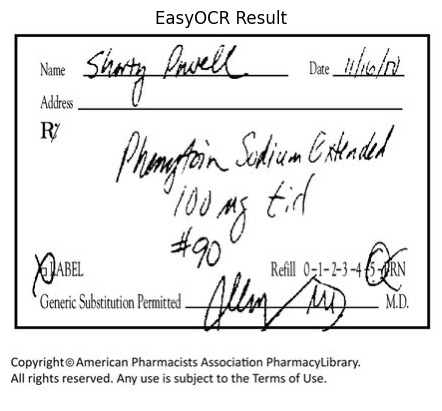


üîç Extracted Text:
- Name (confidence: 99.52%)
- QaeC (confidence: 6.24%)
- Date (confidence: 99.99%)
- uhiloL (confidence: 31.01%)
- Aduress (confidence: 60.75%)
- Rz (confidence: 20.1%)
- Stiun G dadt (confidence: 19.24%)
- 'iod _ (confidence: 11.74%)
- t( (confidence: 22.91%)
- 26 (confidence: 8.35%)
- 49 (confidence: 60.67%)
- KJabEl (confidence: 15.7%)
- Refll 071-1-3-46QRN (confidence: 20.39%)
- Generic Substitution Permnitted (confidence: 41.36%)
- Allaz (confidence: 9.06%)
- MD: (confidence: 29.59%)
- Copyright@ American Pharmacists Association PharmacyLibrary: (confidence: 77.84%)
- All rights reserved_ (confidence: 77.14%)
- Any use is subject to the Terms of Use (confidence: 85.77%)
- Suth (confidence: 17.65%)
- phmuftan, (confidence: 10.23%)


In [ ]:
import easyocr
from matplotlib import pyplot as plt
import cv2

# Initialize the EasyOCR reader (English only for now)
reader = easyocr.Reader(['en'])

# Choose an image (change filename if needed)
image_path = '126.jpg'

# Run OCR
results = reader.readtext(image_path)

# Show the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("EasyOCR Result")
plt.axis("off")
plt.show()

# Print the detected text
print("\nüîç Extracted Text:")
for bbox, text, conf in results:
    print(f"- {text} (confidence: {round(conf * 100, 2)}%)")


‚ÄúTesseract failed to read most prescriptions. After switching to EasyOCR, accuracy and structure improved dramatically. This shows the importance of deep learning in medical OCR.‚Äù

| Feature                               | Tesseract | EasyOCR                                                |
| ------------------------------------- | --------- | ------------------------------------------------------ |
| Configurable modes (`--psm`, `--oem`) | ‚úÖ Yes     | ‚ùå No                                                   |
| Deep-learning based                   | ‚ùå No      | ‚úÖ Yes                                                  |
| Layout settings                       | ‚úÖ Complex | ‚úÖ Internally managed                                   |
| Custom tuning?                        | Manual    | Some control via detection threshold & language models |


In [ ]:
import easyocr
import cv2
from google.colab import files

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Store results
ocr_results = {}

# List of image filenames (1.jpg to 129.jpg)
names = [f"{i}.jpg" for i in range(1, 30)]

# Process all images
for filename in names:
    try:
        print(f"üîÑ Processing: {filename}")
        result = reader.readtext(filename)

        # Combine detected text into one string
        full_text = ' '.join([text for (_, text, _) in result])
        ocr_results[filename] = full_text

        print("‚úÖ Done")
    except Exception as e:
        print(f"‚ùå Error processing {filename}: {e}")


üîÑ Processing: 1.jpg
‚úÖ Done
üîÑ Processing: 2.jpg
‚úÖ Done
üîÑ Processing: 3.jpg
‚úÖ Done
üîÑ Processing: 4.jpg
‚úÖ Done
üîÑ Processing: 5.jpg
‚úÖ Done
üîÑ Processing: 6.jpg
‚úÖ Done
üîÑ Processing: 7.jpg
‚úÖ Done
üîÑ Processing: 8.jpg
‚úÖ Done
üîÑ Processing: 9.jpg
‚úÖ Done
üîÑ Processing: 10.jpg
‚úÖ Done
üîÑ Processing: 11.jpg
‚úÖ Done
üîÑ Processing: 12.jpg
‚úÖ Done
üîÑ Processing: 13.jpg
‚úÖ Done
üîÑ Processing: 14.jpg
‚úÖ Done
üîÑ Processing: 15.jpg
‚úÖ Done
üîÑ Processing: 16.jpg
‚úÖ Done
üîÑ Processing: 17.jpg
‚úÖ Done
üîÑ Processing: 18.jpg
‚úÖ Done
üîÑ Processing: 19.jpg
‚úÖ Done
üîÑ Processing: 20.jpg
‚úÖ Done
üîÑ Processing: 21.jpg
‚úÖ Done
üîÑ Processing: 22.jpg
‚úÖ Done
üîÑ Processing: 23.jpg
‚úÖ Done
üîÑ Processing: 24.jpg
‚úÖ Done
üîÑ Processing: 25.jpg
‚úÖ Done
üîÑ Processing: 26.jpg
‚úÖ Done
üîÑ Processing: 27.jpg
‚úÖ Done
üîÑ Processing: 28.jpg
‚úÖ Done
üîÑ Processing: 29.jpg
‚úÖ Done


In [ ]:

reader = easyocr.Reader(['en'])

# List of image filenames (1.jpg to 129.jpg)
names = [f"{i}.jpg" for i in range(30, 70)]

# Process all images
for filename in names:
    try:
        print(f"üîÑ Processing: {filename}")
        result = reader.readtext(filename)

        # Combine detected text into one string
        full_text = ' '.join([text for (_, text, _) in result])
        ocr_results[filename] = full_text

        print("‚úÖ Done")
    except Exception as e:
        print(f"‚ùå Error processing {filename}: {e}")


üîÑ Processing: 30.jpg
‚úÖ Done
üîÑ Processing: 31.jpg
‚úÖ Done
üîÑ Processing: 32.jpg
‚úÖ Done
üîÑ Processing: 33.jpg
‚úÖ Done
üîÑ Processing: 34.jpg
‚úÖ Done
üîÑ Processing: 35.jpg
‚úÖ Done
üîÑ Processing: 36.jpg
‚úÖ Done
üîÑ Processing: 37.jpg
‚úÖ Done
üîÑ Processing: 38.jpg
‚úÖ Done
üîÑ Processing: 39.jpg
‚úÖ Done
üîÑ Processing: 40.jpg
‚úÖ Done
üîÑ Processing: 41.jpg
‚úÖ Done
üîÑ Processing: 42.jpg
‚úÖ Done
üîÑ Processing: 43.jpg
‚úÖ Done
üîÑ Processing: 44.jpg
‚úÖ Done
üîÑ Processing: 45.jpg
‚úÖ Done
üîÑ Processing: 46.jpg
‚úÖ Done
üîÑ Processing: 47.jpg
‚úÖ Done
üîÑ Processing: 48.jpg
‚úÖ Done
üîÑ Processing: 49.jpg
‚úÖ Done
üîÑ Processing: 50.jpg
‚úÖ Done
üîÑ Processing: 51.jpg
‚úÖ Done
üîÑ Processing: 52.jpg
‚úÖ Done
üîÑ Processing: 53.jpg
‚úÖ Done
üîÑ Processing: 54.jpg
‚úÖ Done
üîÑ Processing: 55.jpg
‚úÖ Done
üîÑ Processing: 56.jpg
‚úÖ Done
üîÑ Processing: 57.jpg
‚úÖ Done
üîÑ Processing: 58.jpg
‚úÖ Done
üîÑ Processing: 59.jpg
‚úÖ Done
üîÑ Proce

In [ ]:

reader = easyocr.Reader(['en'])

# List of image filenames (1.jpg to 129.jpg)
names = [f"{i}.jpg" for i in range(70, 130)]

# Process all images
for filename in names:
    try:
        print(f"üîÑ Processing: {filename}")
        result = reader.readtext(filename)

        # Combine detected text into one string
        full_text = ' '.join([text for (_, text, _) in result])
        ocr_results[filename] = full_text

        print("‚úÖ Done")
    except Exception as e:
        print(f"‚ùå Error processing {filename}: {e}")


üîÑ Processing: 70.jpg
‚úÖ Done
üîÑ Processing: 71.jpg
‚úÖ Done
üîÑ Processing: 72.jpg
‚úÖ Done
üîÑ Processing: 73.jpg
‚úÖ Done
üîÑ Processing: 74.jpg
‚úÖ Done
üîÑ Processing: 75.jpg
‚úÖ Done
üîÑ Processing: 76.jpg
‚úÖ Done
üîÑ Processing: 77.jpg
‚úÖ Done
üîÑ Processing: 78.jpg
‚úÖ Done
üîÑ Processing: 79.jpg
‚úÖ Done
üîÑ Processing: 80.jpg
‚úÖ Done
üîÑ Processing: 81.jpg
‚úÖ Done
üîÑ Processing: 82.jpg
‚úÖ Done
üîÑ Processing: 83.jpg
‚úÖ Done
üîÑ Processing: 84.jpg
‚úÖ Done
üîÑ Processing: 85.jpg
‚úÖ Done
üîÑ Processing: 86.jpg
‚úÖ Done
üîÑ Processing: 87.jpg
‚úÖ Done
üîÑ Processing: 88.jpg
‚úÖ Done
üîÑ Processing: 89.jpg
‚úÖ Done
üîÑ Processing: 90.jpg
‚úÖ Done
üîÑ Processing: 91.jpg
‚úÖ Done
üîÑ Processing: 92.jpg
‚úÖ Done
üîÑ Processing: 93.jpg
‚úÖ Done
üîÑ Processing: 94.jpg
‚úÖ Done
üîÑ Processing: 95.jpg
‚úÖ Done
üîÑ Processing: 96.jpg
‚úÖ Done
üîÑ Processing: 97.jpg
‚úÖ Done
üîÑ Processing: 98.jpg
‚úÖ Done
üîÑ Processing: 99.jpg
‚úÖ Done
üîÑ Proce

In [ ]:
# Save to plain text file
with open("easyocr_output.txt", "w") as f:
    for file, text in ocr_results.items():
        f.write(f"--- {file} ---\n{text}\n\n")

# Download the file
files.download("easyocr_output.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>